# Mahdiazhari Austian
# 11206004

# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5) 
    - preventing overfitting (1)#explain
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [88]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


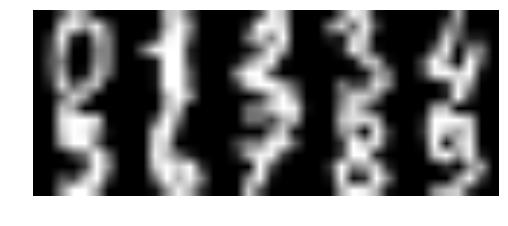

In [89]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [180]:
#Make a logistic prediction function h
def prediction_function(x,theta):
    #z=matrix multiplication of theta and x. Works the same as dot(x,theta). 
    z=dot(theta.T, x)
    return 1/(1+exp(-z))

In [217]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    m = len(y)                          
    former = dot((-y).T,log(x_predict))        #the left part of the vectorized cost function
    latter = dot((1-y).T,log(1-x_predict))     #the right part of the vectorized cost function
    if (len(x_predict[x_predict == 1])):       #log(1-xpredict) cannot be equal to log(0), so if the x-predict is
            latter = 0                          #equal to 1, then latter is 0.
    if (len(x_predict[x_predict == 0])):       #log(xpredict) cannot e equal to log(0), so if xpredict is 0, then 
            former = 0                         #former is 0.
    return (1/m)*(former - latter )

In [218]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    #x =64,1 sizes of x y and x predict for reference
    #y = 10,1
    #xpredict = 10,1
    gradient = (1/len(x))*outer(x.T,(x_predict-y).T) #the vectorized form of the formula, x_predict-y is transposed 
    return gradient                                 #to match my method of making sure things are in the right dim.

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


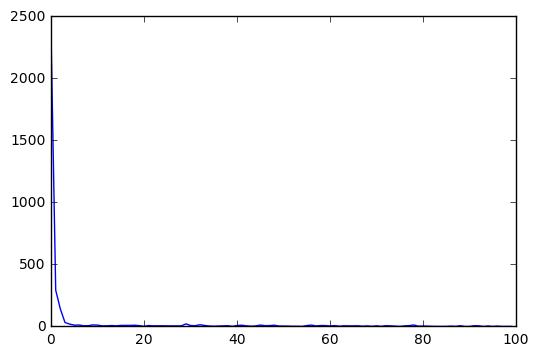

In [239]:
#Choose a suitable learning rate
alpha = 0.1                           #0.5 gives high scores
iterations = 100                      #iterations do not mean much
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

#print (x[0,:])    #print to check data

#Try to save the output of the cost function at each iteration and plot it at the end

#Training iteration                          Where we iterate to get the best possible thetas
cost_iterations = np.zeros(iterations)       #storing the cost per number of iterations
thetas = []
for i in range(iterations):
    cost_j = 0                               #temp variable to store the cost of computing the whole x[j;]
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:].T,theta) 
        #print(shape(x_predict))              #extra functions to see shapes (for troubleshooting)
        y = np.zeros(10)
        y[target[j]] = 1
        cost_j +=cost_function(x_predict,y)   #for every data that it is training on, add the cost to the temp var
        x_predict = reshape(x_predict,(10,1)) #reshape so that the dimension is 10,1 (if I dont reshape, it cannot be multiplied in dot
        dtheta = compute_gradient(x_predict,reshape(y,(10,1)),reshape(x[j,:],(1,64)))
        #print(shape(dtheta))                 #making sure gradients are also 64,10 like the thetas
        theta = theta - alpha*dtheta          #vectorized theta formula implementation
    cost_iterations[i] = cost_j               #storing the cost_j into the cost per iteration array 
    thetas.append(theta)
#print (cost_iterations)                      #printing cost per iterations just to make sure.
iteration_array = list(range(iterations))     #array containing number of iterations
plt.plot(iteration_array,cost_iterations)     #plotting the cost with regards to # of iterations

    


# Testing Phase and Score plot

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp


Best Score:  90.9090909091


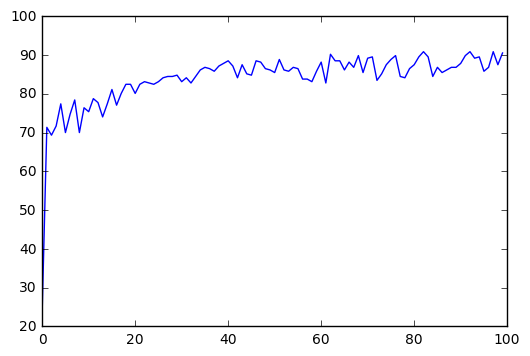

In [240]:
#Testing phase                              #Testing the thetas I obtain to the test set
score_list= np.zeros(iterations)
for i in range(iterations):
    score_j = zeros(x_test.shape[0])            #Stores the score I obtain
    for j in range(x_test.shape[0]):
        y=np.zeros(10)
        y[target_test[j]] = 1
        x_predict = prediction_function(x_test[j,:].T,thetas[i]) #predicts y on for different thetas
        #print(y)                                            #troubleshooting functions
        #print(x_predict)                                    #troubleshooting functions
        for a in range(len(x_predict)):                     #checking that for every element in xpredict and y
            if x_predict[a] == y[a]:                        #if they are equal at the same spot, then add one score
                score_j[j] = 1
            else:
                score_j[j] = 0
    score_list[i] = (np.sum(score_j)/x_test.shape[0])*100     #the score is divided by the number test elements 
                                                              #multiplied by 100 to get percentage
score_index=list(range(iterations))                           #the number of iterations of scores
#print(score_list) #<- just for troubleshooting
plt.plot(score_index,score_list)                               #prints the score and see how it changes with different thetas
                                                               #(how it will improve or not over time)
print("Best Score: ",max(score_list))                        #prints the best score obtained
            
            

# How I picked alpha

Alpha is picked based on its size. In my program, if alpha is small (>= 0.01), then it takes very small steps; resulting
in a small best score(only 70%). My program works best if alpha is  (>= 0.1), but if it is (>= 0.5), it will give very high
scores (95 and above). I found that the iterations do not affect the scores very much. In my final program, to 
match the similar results of 85%, the alpha I used is 0.1. 
With the alpha of 0.1 if I iterate 25 times it gives 83% best score
If I iterate 100 times it gives 90% best score.


# Stop Condition
For this program, due to it's structure, there is no easy way to implement a stop condition. If it were different, I believe that the stop condition would be when the cost is zero.

# Preventing Overfitting
Andrew mentions 2 main options to address overfitting:
1.Reducing the number of features:
    a. Manual selection of features
    b. Using a model selection algorithm
2.Regularization:
    This is a method where the magnitude of some of the parameters are reduced. For example, making theta[j] and theta[k] very close to zero